Text

In [1]:
# Run the 1_functions.ipynb to load all functions
%run "1_cleaning.ipynb"

      Progress   Priority  Start date  Labels
0  Not started     Medium  11/04/2025  Yellow
1  Not started     Medium  11/04/2025    Blue
2  Not started  Important  11/04/2025    Blue
3  Not started        Low  09/04/2025    Blue
4  Not started        Low  11/04/2025    Blue
      Progress   Priority  Start date  Labels
0  Not started     Medium  11/04/2025  Yellow
1  Not started     Medium  11/04/2025    Blue
2  Not started  Important  11/04/2025    Blue
3  Not started        Low  09/04/2025    Blue
4  Not started        Low  11/04/2025    Blue
5  Not started  Important  11/04/2025    Blue
6  In progress     Medium  10/04/2025    Blue
7  Not started  Important  10/04/2025    Blue
8  In progress     Medium  10/04/2025    Blue
9  Not started     Medium  09/04/2025    Blue
Progress      object
Priority      object
Start date    object
Labels        object
dtype: object
Progress              object
Priority              object
Start date    datetime64[ns]
Labels                object
dtyp

/tmp/ipykernel_7457/672462750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Start date"] = df_cleaned["Start date"].astype("datetime64[ns]")  # Ensures it's fully datetime


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Start date (X) / Labels Count (Y) = Line Chart

In [3]:
def line_chart(df_cleaned):

    # Count occurrences of "Labels" per date
    date_counts = df_cleaned["Start date"].value_counts().sort_index()

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(date_counts.index, date_counts.values, marker="o", linestyle="-", color="b", label="")

    # Formatting
    plt.xlabel(f"From {first_date} to {last_date}")
    plt.ylabel("Questions!")
    plt.title("Questions per Day")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Ensure all dates appear on the X-axis
    plt.xticks(date_counts.index, rotation=90)  # Rotate labels for better visibility
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Show every date

    # Return the plot object
    return plt


/tmp/ipykernel_7457/3588940538.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


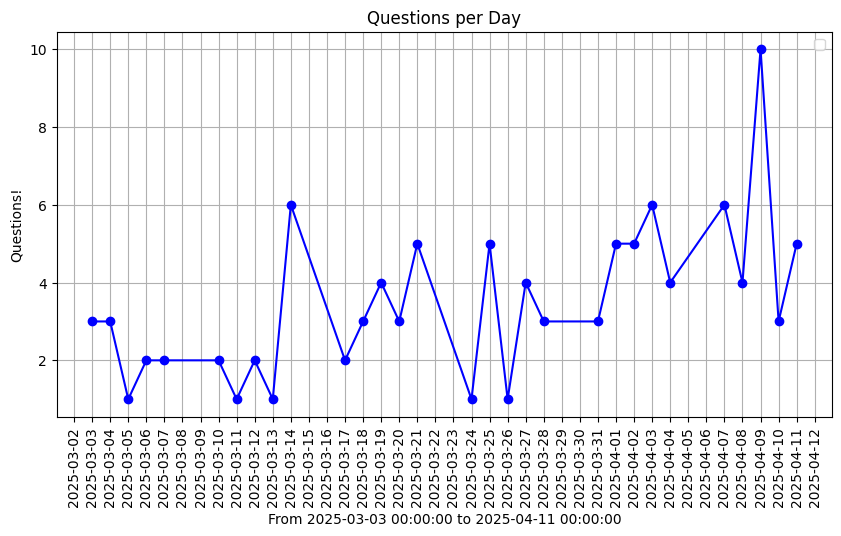

In [4]:
print_line_chart = line_chart(df_cleaned)
print_line_chart.show()

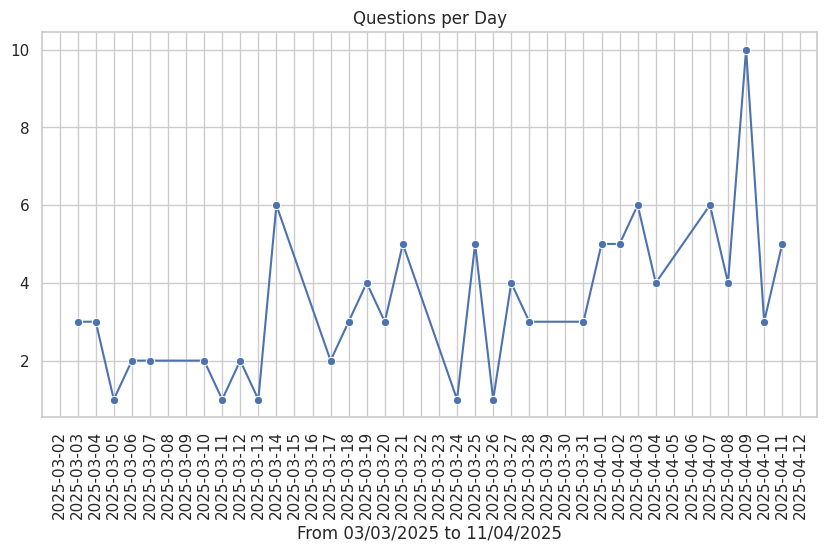

In [5]:
def line_chart_seaborn(df_cleaned):
    # Count occurrences of "Labels" per date
    date_counts = df_cleaned["Start date"].value_counts().sort_index()

    # Set Seaborn theme for a nicer look
    sns.set_theme(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=date_counts.index, y=date_counts.values, marker="o", color="b")

    # Formatting
    plt.xlabel(f"From {df_cleaned['Start date'].min().strftime('%d/%m/%Y')} to {df_cleaned['Start date'].max().strftime('%d/%m/%Y')}")
    plt.ylabel("")
    plt.title("Questions per Day")
    plt.xticks(rotation=45)

    # Ensure all dates appear on the X-axis
    plt.xticks(date_counts.index, rotation=90)  # Rotate labels for better visibility
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Show every date

    # Return the plot object
    return plt

print_line_chart_seaborn = line_chart_seaborn(df_cleaned)
print_line_chart_seaborn.show()

Kolmas versio Q per Day

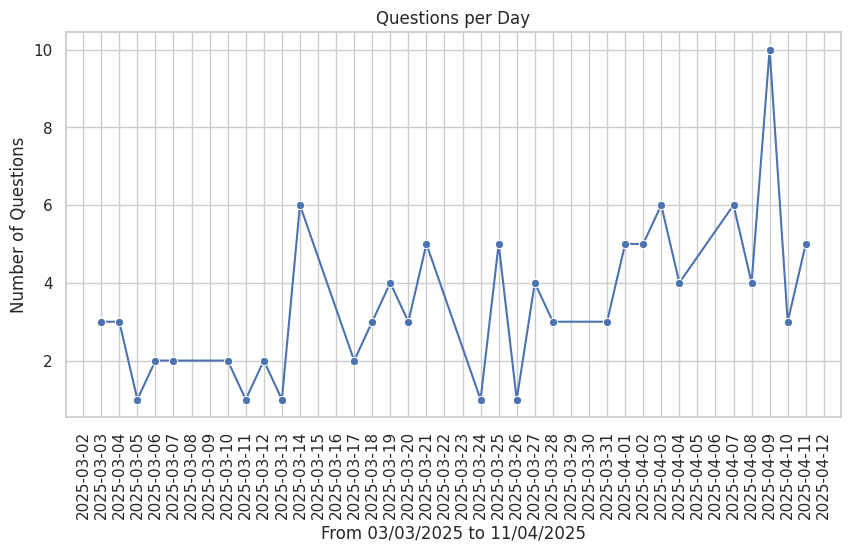

In [16]:
def line_chart_seaborn_3(df_cleaned, month=None, year=None):
    # Make sure we're working with a datetime column
    # df_cleaned["Start date"] = pd.to_datetime(df_cleaned["Start date"])

    # Filter by specific month and year if provided
    if month and year:
        df_filtered = df_cleaned[
            (df_cleaned["Start date"].dt.month == month) &
            (df_cleaned["Start date"].dt.year == year)
        ]
    else:
        df_filtered = df_cleaned

    # Count occurrences per date
    date_counts = df_filtered["Start date"].value_counts().sort_index()

    if date_counts.empty:
        print("No data available for the selected month.")
        return None

    # Seaborn theme
    sns.set_theme(style="whitegrid")

    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=date_counts.index, y=date_counts.values, marker="o", color="b")

    # Formatting
    start = df_filtered["Start date"].min().strftime('%d/%m/%Y')
    end = df_filtered["Start date"].max().strftime('%d/%m/%Y')
    plt.xlabel(f"From {start} to {end}")
    plt.ylabel("Number of Questions")
    plt.title("Questions per Day")
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Every day shown

    return plt


# Show plot for March 2025

#plot_march = line_chart_seaborn_3(df_cleaned, month=3, year=2025)
#if plot_march:
#    plot_march.show()

# Show plot for all data (no month filter)

#plot_all = line_chart_seaborn_3(df_cleaned)
#if plot_all:
#    plot_all.show()

plot_march = line_chart_seaborn_3(df_cleaned)
if plot_march:
    plot_march.show()



Progress = Pie Chart

In [6]:
def pie_chart(df_cleaned):
    # Replace "In progress" with "Chatter" and all other values with "Email"
    df_cleaned["Progress"] = df_cleaned["Progress"].replace({"In progress": "Chatter"})
    df_cleaned.loc[~df_cleaned["Progress"].isin(["Chatter"]), "Progress"] = "Email"

    # Count occurrences
    progress_counts = df_cleaned["Progress"].value_counts()

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(progress_counts, labels=progress_counts.index, autopct='%1.1f%%', 
            colors=["lightblue", "yellow"], startangle=140)
    
    #plt.title("Where the Questions Come (Chatter vs Email)")
    
    return plt

/tmp/ipykernel_7457/2884170211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Progress"] = df_cleaned["Progress"].replace({"In progress": "Chatter"})


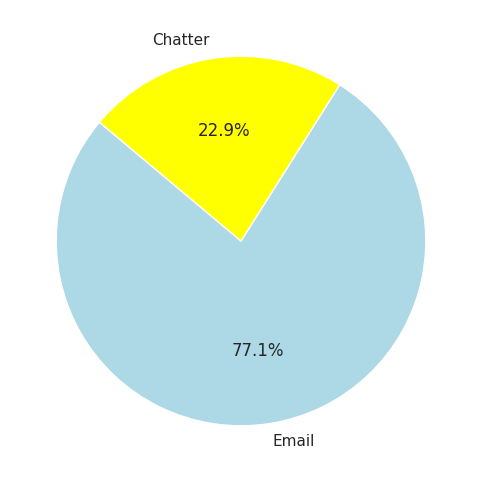

In [7]:
print_pie_chart = pie_chart(df_cleaned)
print_pie_chart.show()

Priority Count (High, Medium, Low) = Bar Chart / Histogram

In [8]:
def bar_chart_1(df):
    # Count occurrences of each unique value in "Labels"
    label_counts = df["Priority"].value_counts()

    # Create bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.bar(label_counts.index, label_counts.values, color=["blue", "yellow", "red"])

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=10, fontweight='bold')    

    # Formatting
    plt.xlabel("Question Labelled As:")
    plt.ylabel("Count of Questions")
    plt.title("Number of Questions")
    plt.xticks(rotation=0)  # Rotate labels for better readability

    return plt


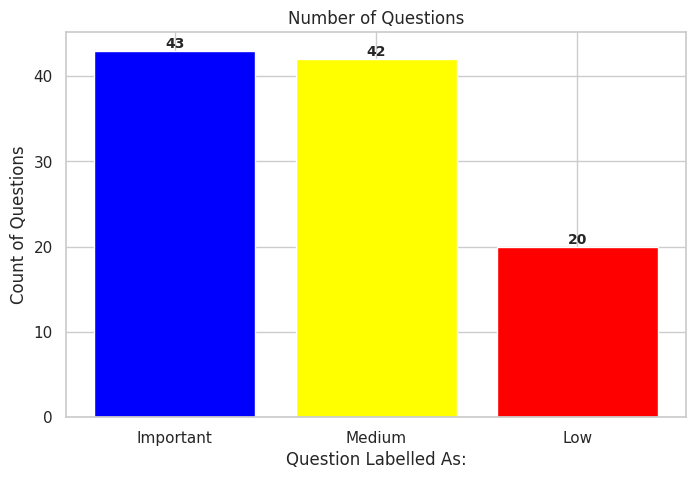

In [9]:
print_bar_chart_1 = bar_chart_1(df_cleaned)
print_bar_chart_1.show()

/tmp/ipykernel_7457/1337596881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Priority", y="Count", data=label_counts, palette=["blue", "yellow", "red"])


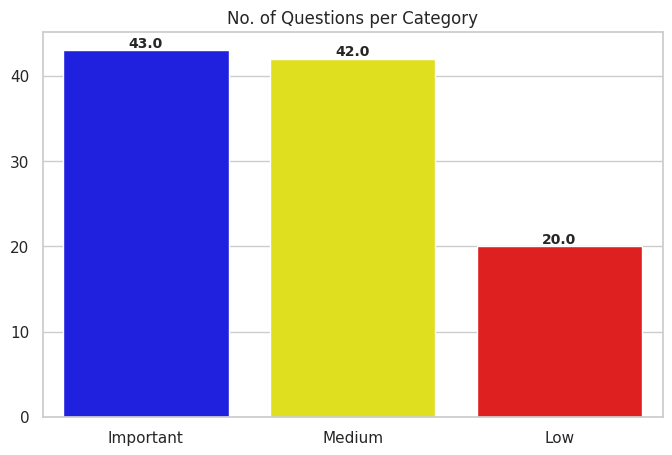

In [10]:
def bar_chart_1_sea(df):
    # Count occurrences of each unique value in "Priority"
    label_counts = df["Priority"].value_counts().reset_index()
    label_counts.columns = ["Priority", "Count"]  # Rename columns for clarity

    # Set Seaborn theme for a nicer look
    sns.set_theme(style="whitegrid")

    # Create bar chart using Seaborn
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x="Priority", y="Count", data=label_counts, palette=["blue", "yellow", "red"])

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Formatting
    plt.xlabel("")
    plt.ylabel("")
    plt.title("No. of Questions per Category")
    plt.xticks(rotation=0)  # Keep labels readable

    return plt

print_bar_chart_1_sea = bar_chart_1_sea(df_cleaned)
print_bar_chart_1_sea.show()

Country bar

In [11]:
def bar_chart_2(df_cleaned):
    # Count occurrences of each unique value in "Labels"
    label_counts = df_cleaned["Labels"].value_counts()

    # Create bar chart
    plt.figure(figsize=(8, 5))
    bars = plt.bar(label_counts.index, label_counts.values, color=["blue", "yellow", "red"])

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Formatting
    plt.xlabel("Country")
    plt.ylabel("Count of Questions")
    plt.title("Number of Questions per Country")
    plt.xticks(rotation=0)  # Rotate labels for better readability

    return plt

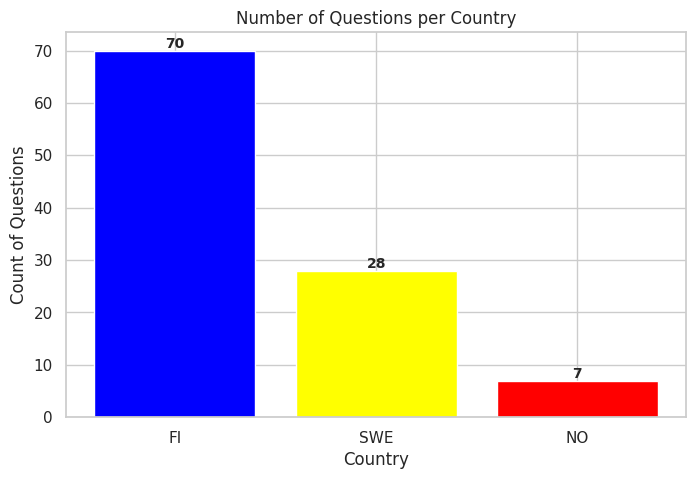

In [12]:
print_bar_chart_2 = bar_chart_2(df_cleaned)
print_bar_chart_2.show()

/tmp/ipykernel_7457/3508552095.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Country", y="Count", data=label_counts, palette=["blue", "yellow", "red"])


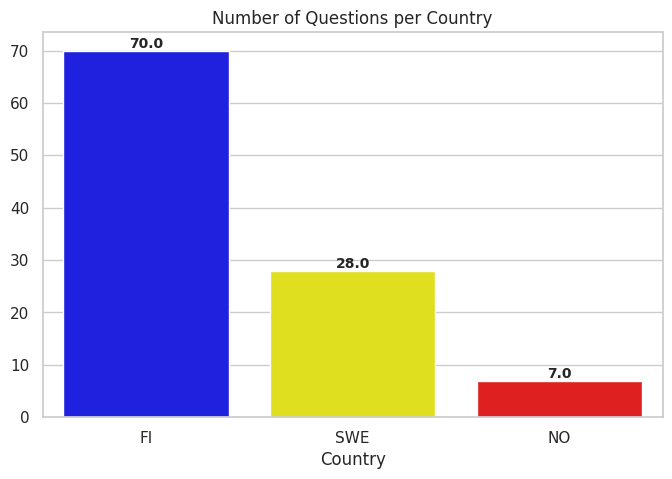

In [13]:
def bar_chart_2_sea(df_cleaned):
    # Count occurrences of each unique value in "Labels"
    label_counts = df_cleaned["Labels"].value_counts().reset_index()
    label_counts.columns = ["Country", "Count"]  # Rename columns for clarity

    # Set Seaborn theme for a cleaner look
    sns.set_theme(style="whitegrid")

    # Create bar chart using Seaborn
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x="Country", y="Count", data=label_counts, palette=["blue", "yellow", "red"])

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Formatting
    plt.xlabel("Country")
    plt.ylabel("")
    plt.title("Number of Questions per Country")
    plt.xticks(rotation=0)  # Keep labels readable

    return plt

print_bar_chart_2_sea = bar_chart_2_sea(df_cleaned)
print_bar_chart_2_sea.show()
